# Excercise 1

Find the dataset from this year with the highest number of frames.

- What is the dataset's Product ID?
- How many frames does the dataset have?
- Is the dataset embargoed? If yes, when does the embargo period end?

**Tips:**

- You can pass `a.Provider("dkist")` to `Fido.search()` to search only for data provided by DKIST
- You can use `.keys()` or `.colnames` on a `DKISTQueryResponse` object to see all the column names

In [27]:
from sunpy.net import attrs as a, Fido
import dkist.net

In [14]:
# Search for all DKIST data this year
res = Fido.search(a.Provider("dkist"), a.Time("2025-01-01", "2026-01-01"))
res

Product ID,Dataset ID,Start Time,End Time,Instrument,Wavelength,Bounding Box,Dataset Size,Exposure Time,Primary Experiment ID,Primary Proposal ID,Stokes Parameters,Target Types,Number of Frames,Average Fried Parameter,Average Polarimetric Accuracy,Embargoed,Embargo End Date,Downloadable,Is Manually Processed,Has Spectral Axis,Has Temporal Axis,Average Spectral Sampling,Average Spatial Sampling,Average Temporal Sampling,Status,Spectral Lines
,,,,,nm,,Gibyte,s,,,,,,,,,,,,,,nm,arcsec,s,,
str8,str6,Time,Time,str10,float64[2],str39,float64,float64,str8,str8,str4,str12[1],int64,object,object,bool,object,bool,bool,bool,bool,float64,float64,float64,str6,object
L1-JZQQI,AFWZGG,2025-03-22T19:19:43.787,2025-03-22T19:21:07.249,CRYO-NIRSP,1077.5276875938443 .. 1081.4360809302982,"(-954.74,490.93),(-1080.58,257.9)",0.12369811534881592,725.0,eid_3_88,pid_3_88,I,activecorona,84,nan,None,False,None,True,False,True,True,0.004276141505967053,0.12,41.731131690478705,ACTIVE,"['Fe XIII (1079.8 nm)', 'He I (1083.0 nm)']"
L1-SGSXN,UKCFYO,2025-03-22T19:21:31.735,2025-03-22T19:22:55.197,CRYO-NIRSP,1072.5480869277164 .. 1076.4889808510122,"(-954.72,490.98),(-1080.6,257.85)",0.12296855449676514,725.0,eid_3_88,pid_3_88,I,activecorona,84,nan,None,False,None,True,False,True,True,0.004373911124634653,0.12,41.73113170237216,ACTIVE,['Fe XIII (1074.7 nm)']
L1-TJKGC,DBXVEL,2025-03-22T17:53:38.890,2025-03-22T17:58:31.826,CRYO-NIRSP,1077.5384641128728 .. 1081.4477727477383,"(-906.95,507.83),(-1126.46,240.31)",0.4776477813720703,725.0,eid_3_88,pid_3_88,I,activecorona,321,nan,None,False,None,True,False,True,True,0.004277142926548664,0.12,146.4683298162026,ACTIVE,"['Fe XIII (1079.8 nm)', 'He I (1083.0 nm)']"
L1-HDVFO,NLPIBO,2025-03-22T19:19:43.787,2025-03-22T19:21:07.249,CRYO-NIRSP,1083.0 .. 1083.0,"(-933.07,444.91),(-1112.22,298.78)",0.2539515495300293,725.0,eid_3_88,pid_3_88,I,activecorona,84,nan,None,False,None,True,False,False,True,nan,0.05308,41.731131690478705,ACTIVE,['He I (1083.0 nm)']
L1-RWRPL,IGRISO,2025-03-22T19:21:31.735,2025-03-22T19:22:55.197,CRYO-NIRSP,1083.0 .. 1083.0,"(-933.07,444.91),(-1112.22,298.78)",0.25396227836608887,725.0,eid_3_88,pid_3_88,I,activecorona,84,nan,None,False,None,True,False,False,True,nan,0.05308,41.73113170237216,ACTIVE,['He I (1083.0 nm)']
L1-AYZEG,YTCGFH,2025-03-22T17:58:58.747,2025-03-22T18:03:51.684,CRYO-NIRSP,1072.549861518578 .. 1076.4902217762783,"(-906.94,507.89),(-1126.47,240.26)",0.4690486192703247,725.0,eid_3_88,pid_3_88,I,activecorona,321,nan,None,False,None,True,False,True,True,0.004373318820977043,0.12,146.46832982243606,ACTIVE,['Fe XIII (1074.7 nm)']
L1-QXQAJ,HEJDOY,2025-03-22T20:21:07.015,2025-03-22T20:22:30.477,CRYO-NIRSP,1072.5480864022475 .. 1076.4889810939733,"(-954.73,490.98),(-1080.58,257.84)",0.12274056673049927,725.0,eid_3_88,pid_3_88,I,activecorona,84,nan,None,False,None,True,False,True,True,0.004373911977498101,0.12,41.73113167856457,ACTIVE,['Fe XIII (1074.7 nm)']
L1-MSCGD,POKNUM,2025-03-22T17:53:38.890,2025-03-22T17:58:31.826,CRYO-NIRSP,1083.0 .. 1083.0,"(-898.15,464.05),(-1160.33,286.09)",0.8557963371276855,725.0,eid_3_88,pid_3_88,I,activecorona,321,nan,None,False,None,True,False,False,True,nan,0.05308,146.4683298162026,ACTIVE,['He I (1083.0 nm)']


In [15]:
# Just get the DKIST results table and sort by number of frames, largest first
res = res['dkist']
res.sort("Number of Frames", reverse=True)

In [28]:
# Print top result, ie dataset with largest number of frames
res[0]["Product ID", "Instrument", "Embargoed", "Number of Frames", "Embargo End Date"]

Product ID,Instrument,Embargoed,Number of Frames,Embargo End Date
str8,str10,bool,int64,object
L1-LHMMP,VISP,True,21000,2025-12-23T15:01:27.580000


# Exercise 2

Load the sample VISP dataset. **Without actually slicing the dataset**, figure out how many files are in the following slices:

- `ds[0]`
- `ds[:, :200]`
- `ds[:, :200, :200]`
- `ds[:, :, :200, :200]`

In [30]:
from dkist import load_dataset
from dkist.data.sample import VISP_L1_KMUPT

ds = load_dataset(VISP_L1_KMUPT)

In [31]:
ds.shape

(4, 425, 980, 2554)

In [32]:
ds.files

DKISTFileManager containing 1700 files stored in /home/drew/.local/share/dkist/VISP_L1_KMUPT.
Each file array has shape (1, 980, 2554).        

In [34]:
ds[0].files

DKISTFileManager containing 425 files stored in /home/drew/.local/share/dkist/VISP_L1_KMUPT.
Each file array has shape (1, 980, 2554).        

In [40]:
ds[:, :200].files

DKISTFileManager containing 800 files stored in /home/drew/.local/share/dkist/VISP_L1_KMUPT.
Each file array has shape (1, 980, 2554).        

In [39]:
ds[:, :200, :200].files

DKISTFileManager containing 800 files stored in /home/drew/.local/share/dkist/VISP_L1_KMUPT.
Each file array has shape (1, 980, 2554).        

In [38]:
ds[:, :, :200, :200].files

DKISTFileManager containing 1700 files stored in /home/drew/.local/share/dkist/VISP_L1_KMUPT.
Each file array has shape (1, 980, 2554).        

# Exercise 3

Using Fido, find the co-temporal VISP dataset, VBI dataset and AIA image from 19:47 on 2024/04/17. Use `sunpy.visualization.drawing.extent` to plot the FOV of the VBI and VISP datasets onto the AIA image.

In [41]:
# Download one VISP and one VBI metadata ASDF file and a co-temporal AIA image for 19:47 on 2024-04-17
# Using sunpy.visualization.drawing.extent plot the FOV of the VBi and VISP datasets on the AIA image.
import matplotlib.pyplot as plt

import sunpy.map
from sunpy.net import Fido, attrs as a
from sunpy.visualization import drawing

import dkist
import dkist.net

In [43]:
res = Fido.search(a.Time("2024-04-17T19:47:00", "2024-04-17T19:48:00"),
                  a.Instrument.vbi | a.Instrument.visp | a.Instrument.aia)
# Download the first result from each provider
files = Fido.fetch(res[:,0])
files.sort()

Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

VBI_L1_20240417T194715_YCNWFH_metadata.asdf:   0%|          | 0.00/1.43M [00:00<?, ?B/s]

VISP_L1_20240417T194718_BZPQW_metadata.asdf:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

aia.lev1.335A_2024_04_17T19_47_00.62Z.image_lev1.fits:   0%|          | 0.00/7.38M [00:00<?, ?B/s]

In [48]:
# Unpack the filenames
vbi_file, visp_file, aia_file = files

# Load VBI and VISP datasets
vbi, visp = dkist.load_dataset((vbi_file, visp_file))

# Load the AIA data
aia = sunpy.map.Map(aia_file)

/home/drew/miniforge3/envs/dkist-workshop/lib/python3.13/site-packages/erfa/core.py:16909: RuntimeWarning: invalid value encountered in taiutc
  utc1, utc2, c_retval = ufunc.taiutc(tai1, tai2)
/home/drew/miniforge3/envs/dkist-workshop/lib/python3.13/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 5112 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


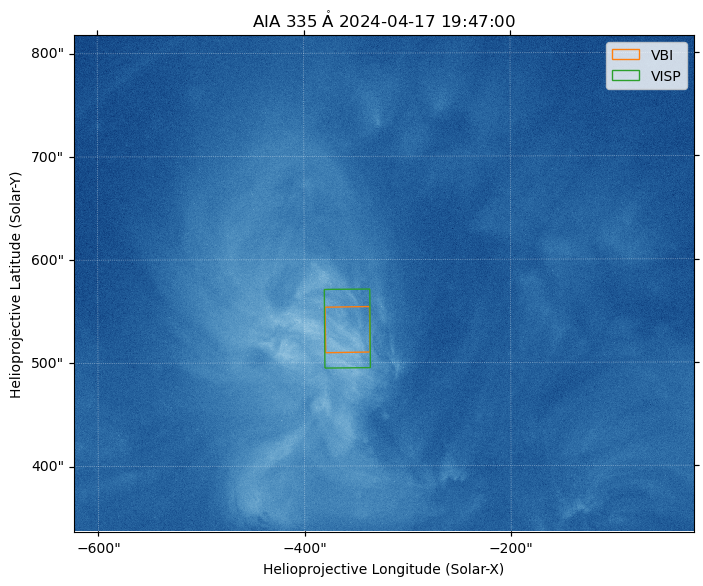

In [49]:
# Create an axes with the AIA data's coordinate frame
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=aia)

# Plot the AIA data
aia.plot(axes=ax)

# Draw the extents of the VBI and VISP data
drawing.extent(ax, vbi[0].wcs, color="C1", label="VBI")
drawing.extent(ax, visp[0,:,0,:].wcs, color="C2", label="VISP")

plt.legend()

_ = ax.axis((1000, 2000, 2600, 3400))

# Exercise 4

Open the VBI sample dataset again. Choose two adjacent tiles and calculate the overlap between them in arcseconds.

In [6]:
from dkist.data.sample import VBI_L1_NZJTB
from dkist import load_dataset
import astropy.units as u

ds = load_dataset(VBI_L1_NZJTB)

In [2]:
# We only need the first image of each tile
first_tiles = ds.slice_tiles[0]

In [3]:
# The bottom left tile is 0,0, get the corner pixel on the right side
tile1_bottom_right_pix = first_tiles[0,0].wcs.array_index_to_world(0, 4096)
tile1_bottom_right_pix

<SkyCoord (Helioprojective: obstime=2023-10-16T18:47:15.133, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2023-10-16T18:47:15.133, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.00208195, 5.78035741, 1.49134598e+11)>): (Tx, Ty) in arcsec
    (-177.00927891, 21.80365029)>

In [4]:
# The bottom middle tile is 1,0, get the corner pixel on the left side
tile2_bottom_left_pix = first_tiles[1,0].wcs.array_index_to_world(0, 0)
tile2_bottom_left_pix

<SkyCoord (Helioprojective: obstime=2023-10-16T18:47:18.180, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2023-10-16T18:47:18.180, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.00208169, 5.78035493, 1.49134596e+11)>): (Tx, Ty) in arcsec
    (-184.44728842, 21.70597976)>

In [7]:
(tile1_bottom_right_pix.separation(tile2_bottom_left_pix).to(u.arcsec),

tile1_bottom_right_pix.Tx - tile2_bottom_left_pix.Tx,

tile1_bottom_right_pix.Ty - tile2_bottom_left_pix.Ty)

/home/drew/miniforge3/envs/dkist-workshop/lib/python3.13/site-packages/astropy/coordinates/baseframe.py:1985: NonRotationTransformationWarning: transforming other coordinates from <Helioprojective Frame (obstime=2023-10-16T18:47:18.180, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2023-10-16T18:47:18.180, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.00208169, 5.78035493, 1.49134596e+11)>)> to <Helioprojective Frame (obstime=2023-10-16T18:47:15.133, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2023-10-16T18:47:15.133, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.00208195, 5.78035741, 1.49134598e+11)>)>. Angular separation can depend on the direction of the transformation.
  warnings.warn(NonRotationTransformationWarning(self, other_frame))


(<Angle 7.43814051 arcsec>,
 <Angle 7.43800951 arcsec>,
 <Angle 0.09767053 arcsec>)